## Diseño aerodinámico

Existen cuatro variables que representan valores de parámetros para el diseño de el ala de una aeronave. Cada uno de estos parámetros puede tomar un valor entre 0 y 63.

El modelo aerodinámico dice que la elevación del ala está dada por la formula:

Elevación = (A - B)² + (C - D)² - (A-30)³ - (C-40)³

Encontrar los valores de parámetros que maximicen la elevación del ala.

## Codificación

- Definir como se codificará el problema
Para este problema el cromosoma estará compuesto por 4 genes cada uno de ellos representarán los valores de los parámetros del ala del aeronave

[X1 X2 X3 X4]

In [1]:
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
 

## Adaptación

- Definir como se calculará la adaptación de un individuo
- ¿Existen estados que deben ser penalizados?

La función de adaptación será el resultado de la fórmula de elevación. Ya que se trata de maximizar el resultado. A mayor reultado mayor adaptación.


In [2]:
def adaptation_function(population):
    fitness = []
    for pop in population:
        fitness.append(
            ((pop[0] - pop[1]) ** 2) +
            ((pop[2] - pop[3]) ** 2) -
            ((pop[0] - 30) ** 3) -
            ((pop[2] - 30) ** 3)
        )
    return fitness

## Selección

In [3]:
# Recibe la lista con los entrenamientos de cada hijo y los ordena con numeros enteros ej: [1,2,3,4,5,6] basandose en el valor
# que se obtuvo en la adaptacion.
def rank(fitness,population):
    adaptation_function(population)
    array = np.array(fitness)
    temp = array.argsort()
    return (np.arange(len(array))[temp.argsort()]).tolist()
 
 
# Calculamos la probabilidad que tiene cada hijo, basandonos en la "SELECCION BASADA EN RANKING".
def probability(population, fitness):
    probability_list = []
    ranking = rank(fitness, population)
    for i in range(len(population)):
        probability_list.append(
            ((ranking[i]) / sum(ranking))
        )
    return probability_list
 
 
# Seleccionamos el/los padres de la lista de la poblacion, basandonos en la 
# probabilidad de cada individuo.
def select_parents(parents_num, population_len, probability_list):
    # population, weights = probability_list, k = parents_num
    population_aux = range(population_len)
    print(probability_list)
    parent_indexs = np.random.choice(population_aux,size=parents_num, replace=False, p=probability_list)
    return [population[i] for i in parent_indexs]



## Cruza

In [4]:
def crossover(parents):
    parents = np.array(parents)
    childrens = np.empty((len(parents),parents.shape[1]))
    crossover_point = np.uint8(parents.shape[0]/2)
    print(crossover_point)
    for k in range(len(parents)):
        # Índice del primer padre para realizar la cruza
        parent1_idx = k%parents.shape[0]
        # Índice del segundo padre para realizar la cruza
        parent2_idx = (k+1)%parents.shape[0]
        # Generar el primer hijo con la primer mitad de un padre y la segunda de otro
        childrens[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # Generar el segundo hijo con las partes opuestas
        childrens[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    #Devolver lista de hijos
    return childrens

## Mutación
#### aplicamos mutación por limite - menor.

In [5]:
def mutation(childrens):
    for i, children in enumerate(childrens):
        random_index = random.choice(range(4))
        childrens[i][random_index] = round(random.uniform(0,63), 2)
    return childrens

# Algoritmo

In [6]:
def create_population():
    population = []
    amount_population = 60

    for _ in range(amount_population):
        a = round(random.uniform(0, 63),2)
        b = round(random.uniform(0, 63),2)
        c = round(random.uniform(0, 63),2)
        d = round(random.uniform(0, 63),2)

        population.append([round(a, 2),round(b, 2),round(c, 2),round(d, 2)])
    return population
if __name__ == "__main__":
    
    population = create_population()
    population_len = len(population)
    
    best_adaptation = list()
    generation = list()
    
    for i in range(200):
        fitness = adaptation_function(population)
        probability_list = probability(population, fitness)
        #print(probability_list)
        selected_parents = select_parents(population_len // 2, population_len, probability_list)
        #print(selected_parents)
        childrens = crossover(selected_parents)
        #print(childrens)
        childrens = mutation(childrens)
        #print(childrens)
        selected_parents.extend(childrens.tolist())
        new_population = selected_parents
        #print(new_population)
        population_len = len(new_population)
        population = new_population
        best_adaptation.append(max(fitness))
        generation.append(i)
        
    
    

[0.023728813559322035, 0.030508474576271188, 0.011299435028248588, 0.011864406779661017, 0.022598870056497175, 0.012994350282485875, 0.010169491525423728, 0.0, 0.031638418079096044, 0.01864406779661017, 0.0022598870056497176, 0.00847457627118644, 0.010734463276836158, 0.02655367231638418, 0.014124293785310734, 0.0062146892655367235, 0.015819209039548022, 0.01807909604519774, 0.00903954802259887, 0.022033898305084745, 0.025423728813559324, 0.0011299435028248588, 0.01694915254237288, 0.024858757062146894, 0.003389830508474576, 0.0039548022598870055, 0.005084745762711864, 0.007344632768361582, 0.020338983050847456, 0.03333333333333333, 0.0096045197740113, 0.02711864406779661, 0.001694915254237288, 0.006779661016949152, 0.01638418079096045, 0.012429378531073447, 0.015254237288135594, 0.023163841807909605, 0.03220338983050847, 0.004519774011299435, 0.007909604519774011, 0.029943502824858758, 0.0005649717514124294, 0.01751412429378531, 0.021468926553672316, 0.0327683615819209, 0.019209039548

# Grafico

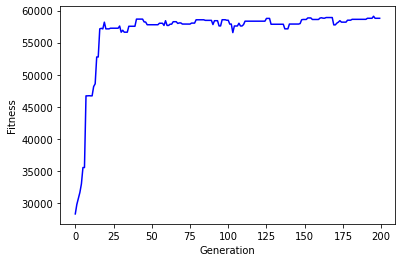

In [7]:
fig, ax = plt.subplots()
ax.plot(generation, best_adaptation, 'b')
ax.set_ylabel('Fitness')
ax.set_xlabel('Generation')
plt.show()